In [ ]:
import pandas as pd


file_path = 'diabetes_prediction_dataset.csv'
data = pd.read_csv(file_path)


data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:


initial_row_count = data.shape[0]
data.drop_duplicates(inplace=True)
duplicates_removed = initial_row_count - data.shape[0]
print(f'Duplicates Removed: {duplicates_removed}')


Duplicates Removed: 3854


In [ ]:

data['smoking_history'] = data['smoking_history'].replace("No Info", pd.NA)

In [ ]:

data.columns = data.columns.str.lower().str.replace(' ', '_')

In [ ]:

data['gender_encoded'] = data['gender'].map({'Female': 0, 'Male': 1})


smoking_mapping = {
    'never': 0,
    'former': 1,
    'current': 2,
    'NaN': -1,
    'No Info': 3
}

data['smoking_history_encoded'] = data['smoking_history'].map(smoking_mapping)


print(data[['gender_encoded', 'smoking_history_encoded']].head())

   gender_encoded  smoking_history_encoded
0             0.0                      0.0
1             0.0                      NaN
2             1.0                      0.0
3             0.0                      2.0
4             1.0                      2.0


In [ ]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,hba1c_level,blood_glucose_level,diabetes,gender_encoded,smoking_history_encoded
0,Female,80.0,0,1,never,25.19,6.6,140,0,0.0,0.0
1,Female,54.0,0,0,<NA>,27.32,6.6,80,0,0.0,NaN
2,Male,28.0,0,0,never,27.32,5.7,158,0,1.0,0.0
3,Female,36.0,0,0,current,23.45,5.0,155,0,0.0,2.0
4,Male,76.0,1,1,current,20.14,4.8,155,0,1.0,2.0


In [ ]:

Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)
IQR = Q3 - Q1

data = data[(data['bmi'] >= (Q1 - 1.5 * IQR)) & (data['bmi'] <= (Q3 + 1.5 * IQR))]


In [ ]:

data['age_normalized'] = (data['age'] - data['age'].min()) / (data['age'].max() - data['age'].min())


In [ ]:

data['age_group'] = pd.cut(data['age'], bins=[0, 30, 50, 70, 100], labels=['0-30', '30-50', '50-70', '70+'])


In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
data[['bmi_standardized', 'hba1c_level_standardized']] = scaler.fit_transform(data[['bmi', 'hba1c_level']])


In [ ]:

data['hypertension'] = data['hypertension'].replace({0: 'No', 1: 'Yes'}).astype('category')
data['heart_disease'] = data['heart_disease'].replace({0: 'No', 1: 'Yes'}).astype('category')


In [ ]:

data['at_risk'] = ((data['hypertension'] == 'Yes') | (data['heart_disease'] == 'Yes') | (data['bmi'] > 30)).astype(int)


In [ ]:

numerical_summary = data.describe()
print(numerical_summary)


                age           bmi   hba1c_level  blood_glucose_level  \
count  90792.000000  90792.000000  90792.000000         90792.000000   
mean      41.663144     26.410518      5.520132           137.697385   
std       22.667178      5.233696      1.065622            40.342693   
min        0.080000     13.710000      3.500000            80.000000   
25%       23.000000     23.170000      4.800000           100.000000   
50%       43.000000     27.320000      5.800000           140.000000   
75%       60.000000     28.840000      6.200000           159.000000   
max       80.000000     39.550000      9.000000           300.000000   

           diabetes  gender_encoded  smoking_history_encoded  age_normalized  \
count  90792.000000    90774.000000             49490.000000    90792.000000   
mean       0.079467        0.421894                 0.523843        0.520310   
std        0.270468        0.493864                 0.774427        0.283623   
min        0.000000        0.00

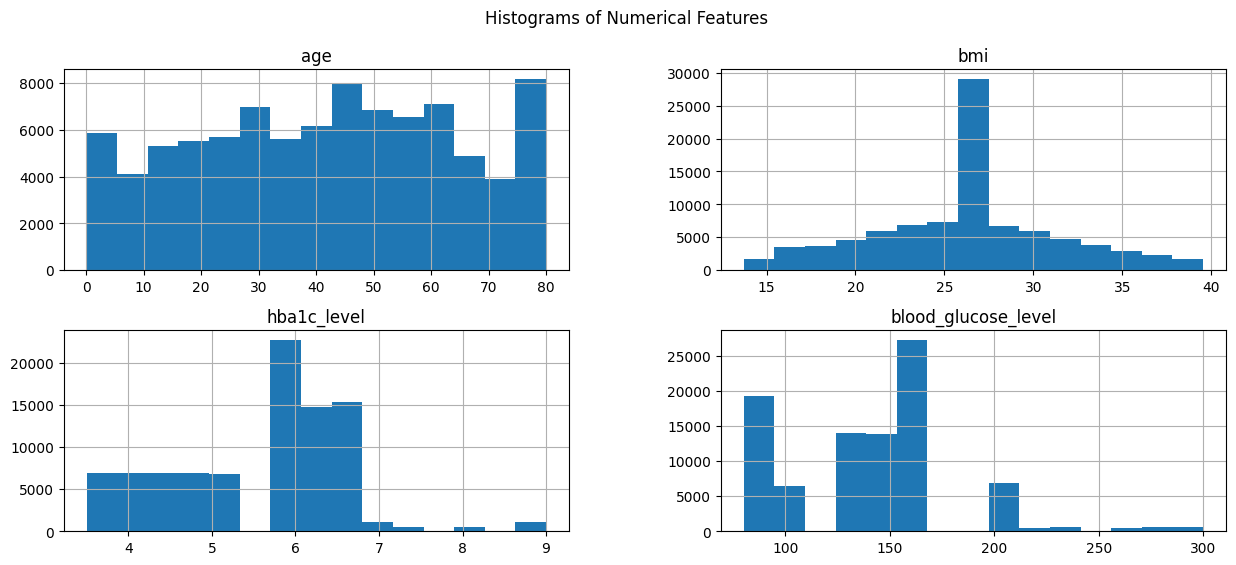

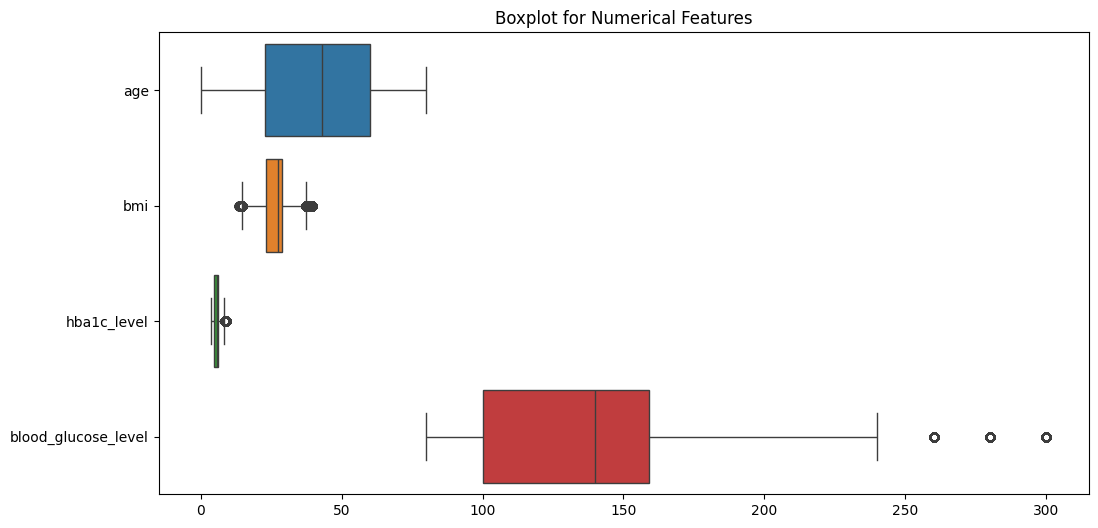

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


numerical_cols = ['age', 'bmi', 'hba1c_level', 'blood_glucose_level']
data[numerical_cols].hist(bins=15, figsize=(15, 6))
plt.suptitle('Histograms of Numerical Features')
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_cols], orient='h')
plt.title('Boxplot for Numerical Features')
plt.show()


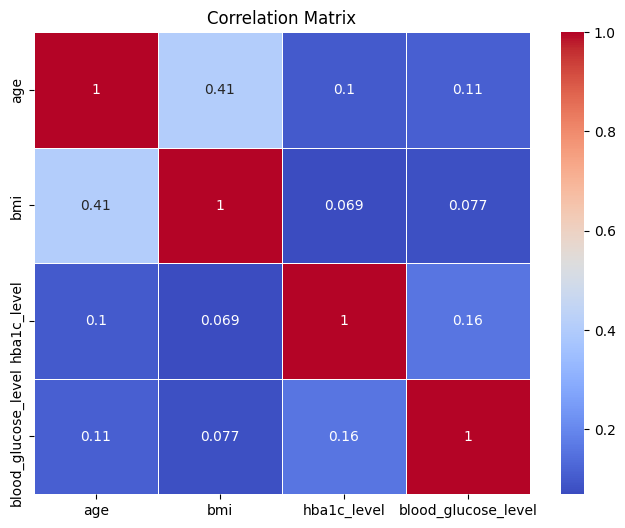

In [ ]:

correlation_matrix = data[['age', 'bmi', 'hba1c_level', 'blood_glucose_level']].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

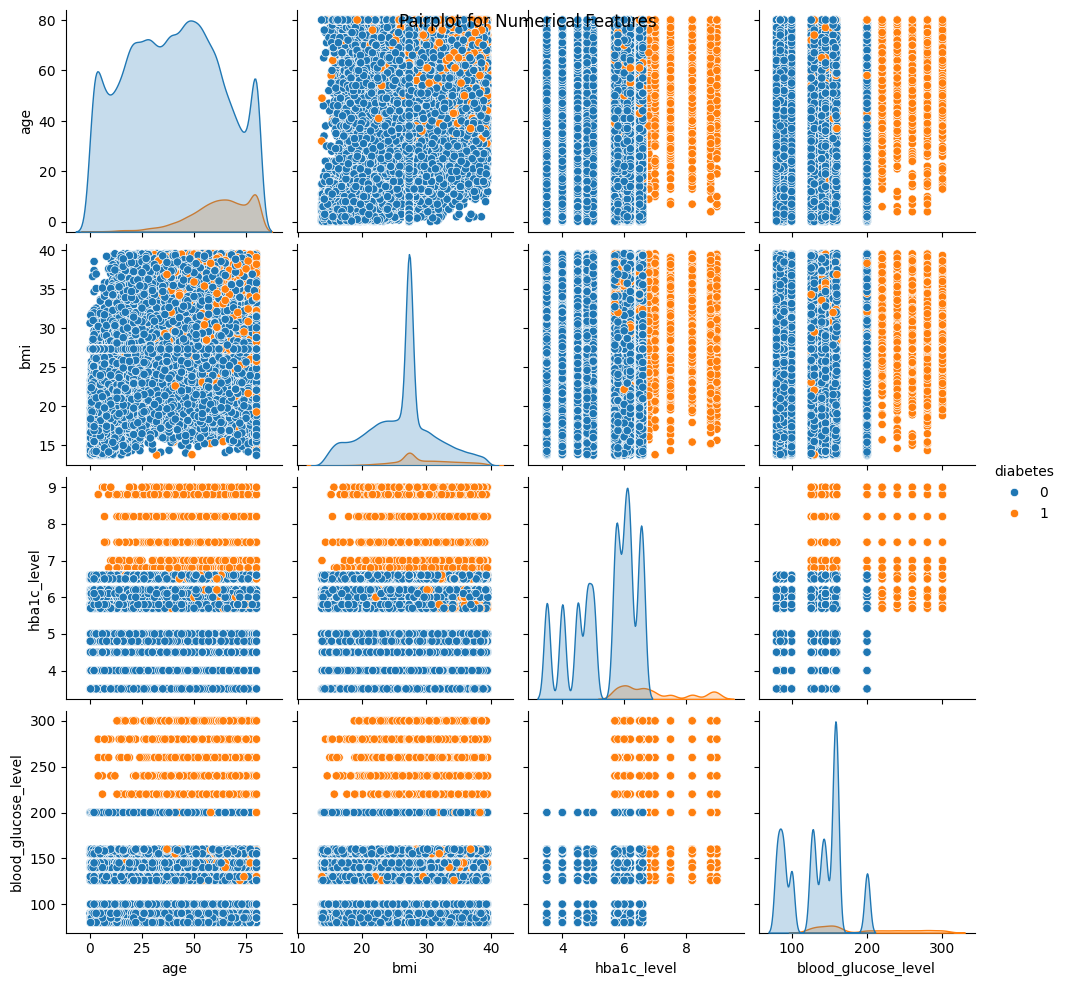

In [ ]:

sns.pairplot(data[['age', 'bmi', 'hba1c_level', 'blood_glucose_level', 'diabetes']], hue='diabetes')
plt.suptitle('Pairplot for Numerical Features')
plt.show()


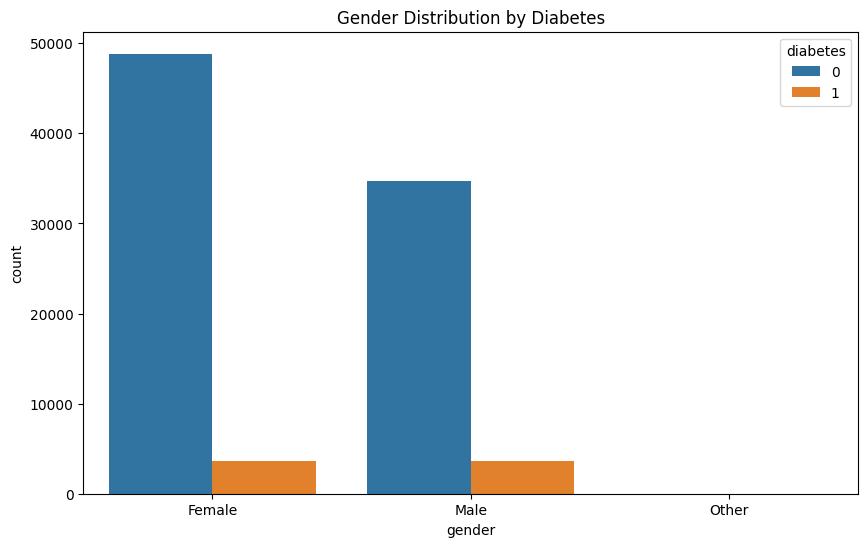

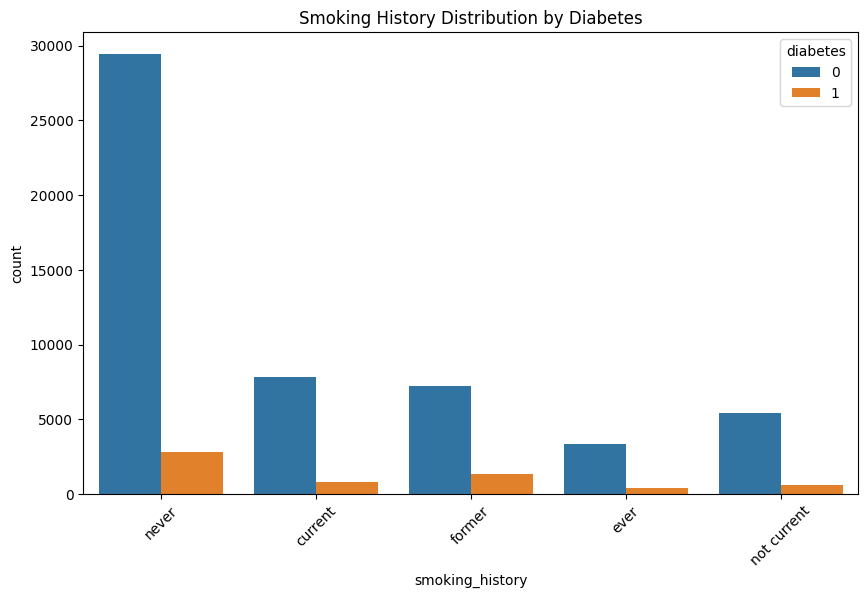

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='diabetes', data=data)
plt.title('Gender Distribution by Diabetes')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='smoking_history', hue='diabetes', data=data)
plt.title('Smoking History Distribution by Diabetes')
plt.xticks(rotation=45)
plt.show()


## Dasarla Akshay Kumar , 50592353

### Hypothesis - 1 : Does an individual's BMI correlate with their likelihood of developing diabetes?

Body Mass Index (BMI) is an important health metric, it is recognized as an indicator of body fat and a strong predictor of metabolic conditions. Since obesity and high BMI values are often related to an increased risk of developing chronic conditions such as diabetes, this hypothesis aims to examine whether a higher BMI is corelated with a higher prevalence of diabetes.

One of the most common chronic diseases in the world is diabetes, and early detection and prevention depend on knowing risk factors like BMI. If a substantial correlation is discovered between BMI and diabetes, this would assist medical practitioners in creating more specialized interventions and preventative plans for those with higher BMIs. Verifying this association may further support the use of BMI as a critical component in predictive models for diabetes detection, increasing the precision of the diagnosis.



In [ ]:
df_akshay = pd.read_csv('diabetes_prediction_dataset.csv')


df_bmi = df_akshay[['gender', 'bmi', 'diabetes']].dropna()

## Step 1: Data Cleaning and Preparation
Before analyzing the data, we must ensure that the BMI column is cleaned and prepared for analysis. This includes:

In [ ]:
print(df_akshay['bmi'].isnull().sum())


df_akshay_cleaned = df_akshay.dropna(subset=['bmi'])

0


## Step 2: Visualization of BMI Distribution Across Diabetic and Non-Diabetic Individuals

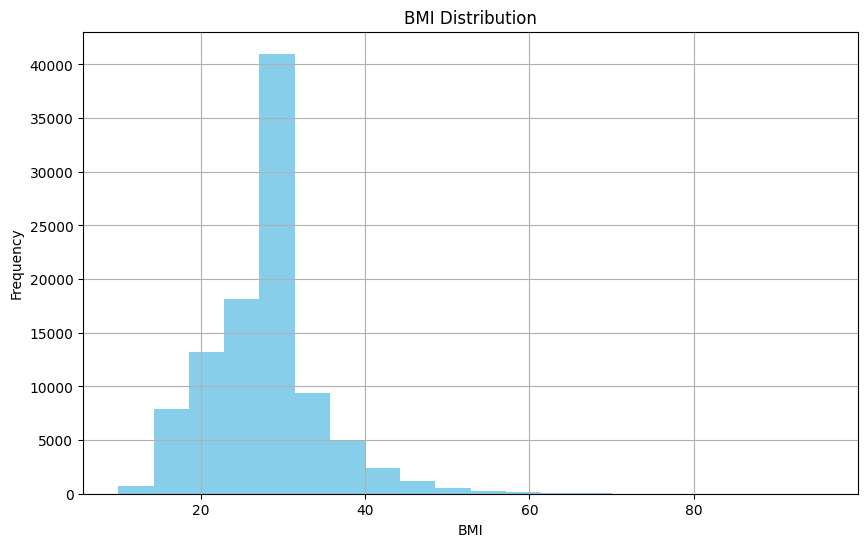

In [ ]:
plt.figure(figsize=(10, 6))
df_akshay_cleaned['bmi'].hist(bins=20, color='skyblue')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

<ipython-input-24-c0301e7beac5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='diabetes', y='bmi', data=df_akshay_cleaned, palette="Set2")


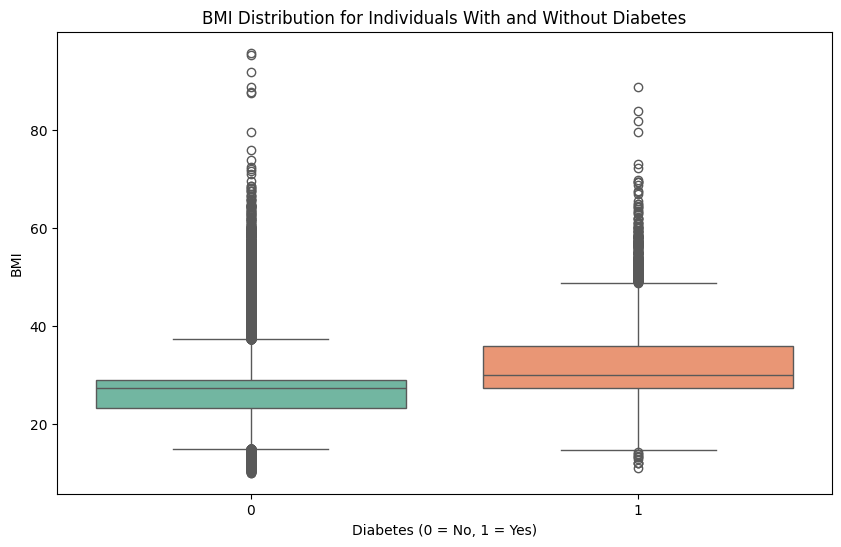

In [ ]:
import seaborn as sb
plt.figure(figsize=(10, 6))
sb.boxplot(x='diabetes', y='bmi', data=df_akshay_cleaned, palette="Set2")
plt.title('BMI Distribution for Individuals With and Without Diabetes')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('BMI')
plt.show()

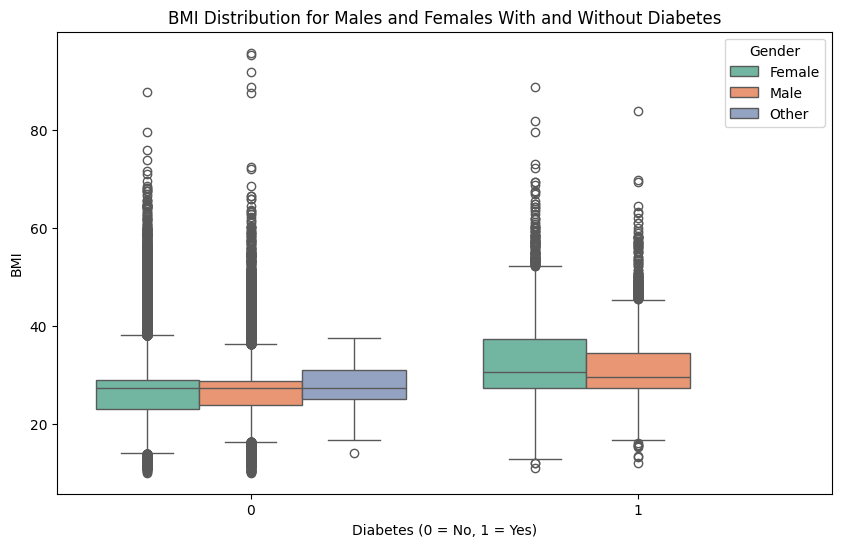

In [ ]:
df_akshay['gender'] = df_akshay_cleaned['gender'].map({0: 'Female', 1: 'Male'})


plt.figure(figsize=(10, 6))
sb.boxplot(x='diabetes', y='bmi', hue='gender', data=df_akshay_cleaned, palette="Set2")
plt.title('BMI Distribution for Males and Females With and Without Diabetes')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('BMI')
plt.legend(title='Gender')
plt.show()

The average BMI of people with and without diabetes was compared in order to test this hypothesis. The BMI distribution for these two groups was plotted as a box plot, highlighting the overall spread and center tendency. According to the idea, those with diabetes should have a higher median BMI than people without the disease.



## Conclusion for hypothesis 1

After conducting the EDA that comaprision of BMI with people having diabetis and people not having diabetis we conclude these below points -

1 . Higher BMI value is associated with increased likelihood of Diabetis

For this we plotted the above graphs where people having diabetis is having high BMI values . This is common for both males and females as we plotted separately in the second graph . Thus high BMI values are associated with increased likelihood of diabetis.

2 . Obesity is the factor of causing diabetis

Higher BMI values denotes that high fat percentage in the body which means the person is obesed so irrespective of gender obesity can increase the likelihood of causing diabetis .

### Hypothesis 2 - Does age impact the prevalence of diabetes in individuals?

Age is one of the major factor that increases the likelihood of causing diabetis because as the age increases there would be many factors that will affect our health . In that reduced metabolic efficiency, higher rates of insulin resistance are some cases . So we see old people having diabetis .

We justify this hypothesis by showing the diabetis causing in different age groups like e.g., 20-30, 30-40, etc. Our goal is to prove that as we are getting old there would be more probability of cause diabetis

In [ ]:
print(df_akshay_cleaned['age'].describe())

count    100000.000000
mean         41.885856
std          22.516840
min           0.080000
25%          24.000000
50%          43.000000
75%          60.000000
max          80.000000
Name: age, dtype: float64


## Step 1: Convert Normalized Age Values to Real Age Values
In case the age values are normalized, we first need to reverse the normalization to get back to real age values using the formula:

Real Age
=
(
Normalized Age
×
Standard Deviation
)
+
Mean
Real Age=(Normalized Age×Standard Deviation)+Mean

## Step 2: Create Age Groups and Visualisation
Once the real ages are obtained, we categorize the individuals into age groups, such as 20-30, 30-40, etc.

<ipython-input-33-eb9af7d0d7be>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diabetes_counts = df_akshay_cleaned[df_akshay_cleaned['diabetes'] == 1].groupby('age_group').size()


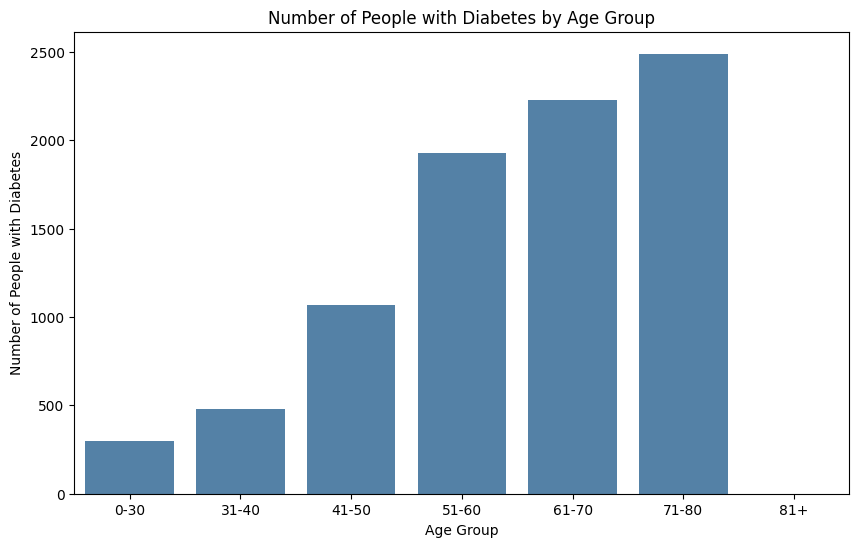

In [ ]:
bins = [0, 30, 40, 50, 60, 70, 80, 100]
labels = ['0-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81+']

df_akshay_cleaned['age_group'] = pd.cut(df_akshay_cleaned['age'], bins=bins, labels=labels)


diabetes_counts = df_akshay_cleaned[df_akshay_cleaned['diabetes'] == 1].groupby('age_group').size()


plt.figure(figsize=(10, 6))
sns.barplot(x=diabetes_counts.index, y=diabetes_counts.values, color="steelblue")
plt.title('Number of People with Diabetes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of People with Diabetes')
plt.show()

## Conclusion for hypothesis 2

After conducting EDA on the relationship between age and diabetes prevalence, the following conclusions were drawn:


1. Higher Prevaliance of Diabetis in older age groups

As we saw from the analysis that as the age is increasing there is more likelihood of people for causing diabetis . This is true that the change in health factors like reduced metabolic efficiency, higher rates of insulin resistance will affect the cause of diabetis

2. Age is risk factor for causing diabetis

A person's age significantly influences their risk of developing diabetes. People's metabolic processes slow down with age, increasing the risk of diseases like insulin resistance, which can develop into diabetes

# Project Phase 2

# Dasarla Akshay Kumar - 50592353





In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Encode the Categorical Values

In [ ]:

df_encoded = pd.get_dummies(df_akshay_cleaned, columns=['gender', 'smoking_history', 'age_group'], drop_first=True)


X = df_encoded.drop('diabetes', axis=1)
y = df_encoded['diabetes']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 1 . Logistic Regression

Logistic Regression Accuracy: 0.9591
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.87      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.92      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



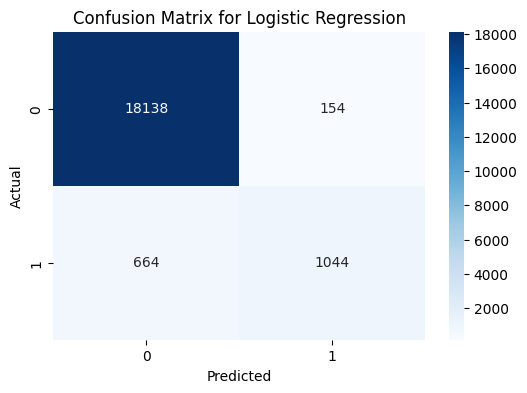

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


y_pred_log = log_reg.predict(X_test)


print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 2 . Decision Tree

Decision Tree Accuracy: 0.95205
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.71      0.74      0.73      1708

    accuracy                           0.95     20000
   macro avg       0.84      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000



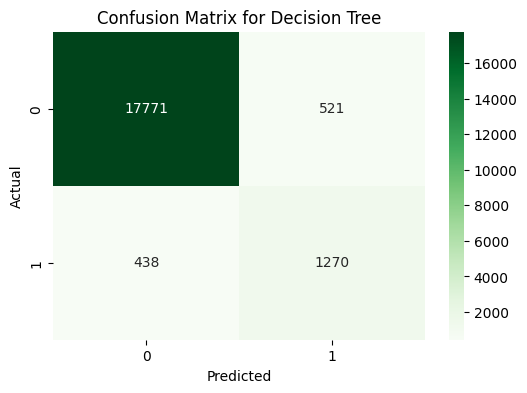

In [ ]:

dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train, y_train)


y_pred_tree = dec_tree.predict(X_test)


print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 3 . KNN (K Nearest Neighbour)

k-NN Accuracy: 0.95435
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.89      0.53      0.66      1708

    accuracy                           0.95     20000
   macro avg       0.92      0.76      0.82     20000
weighted avg       0.95      0.95      0.95     20000



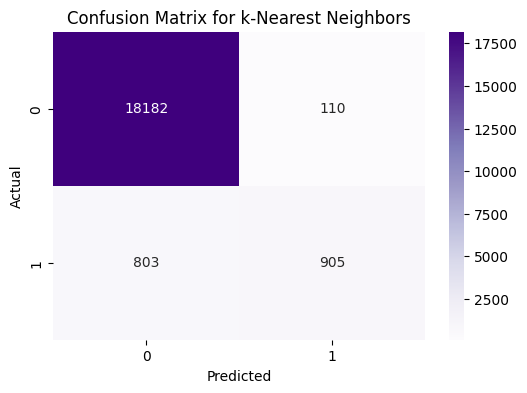

In [ ]:

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)


y_pred_knn = knn.predict(X_test)

print("k-NN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix for k-Nearest Neighbors")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Comparision of the Accuracies of the Logistic Regression , Decision Tree and  KNN algorithm

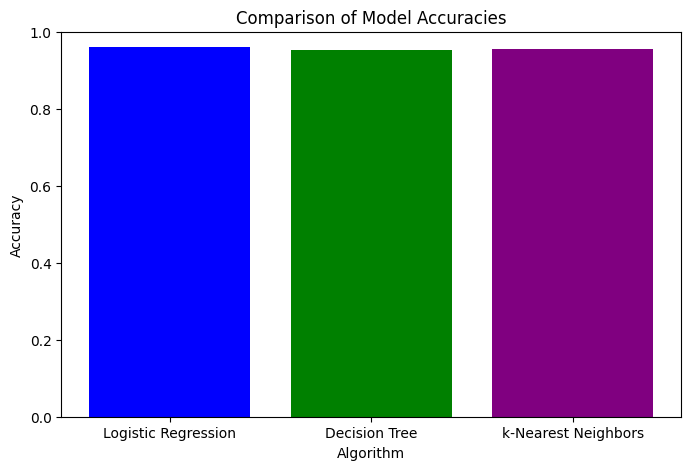

In [ ]:

X = df_encoded.drop('diabetes', axis=1)
y = df_encoded['diabetes']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


log_reg = LogisticRegression(max_iter=1000)
dec_tree = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)


log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log)


dec_tree.fit(X_train, y_train)
y_pred_tree = dec_tree.predict(X_test)
dec_tree_accuracy = accuracy_score(y_test, y_pred_tree)


knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)


accuracies = {
    'Logistic Regression': log_reg_accuracy,
    'Decision Tree': dec_tree_accuracy,
    'k-Nearest Neighbors': knn_accuracy
}


plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'purple'])
plt.title('Comparison of Model Accuracies')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

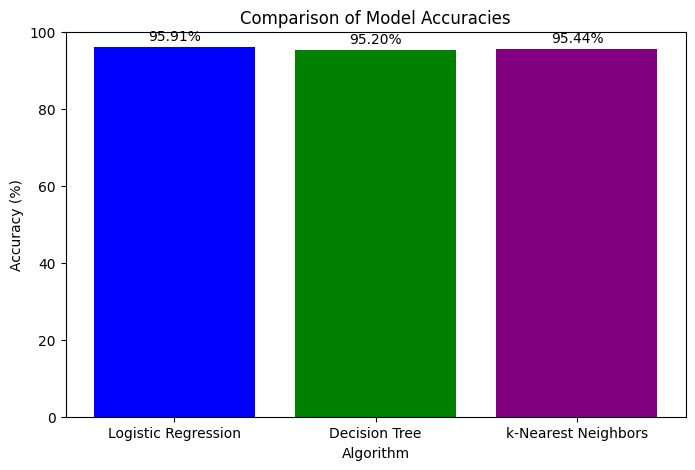

In [ ]:

accuracies = {
    'Logistic Regression': log_reg_accuracy * 100,
    'Decision Tree': dec_tree_accuracy * 100,
    'k-Nearest Neighbors': knn_accuracy * 100
}

plt.figure(figsize=(8, 5))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'purple'])
plt.title('Comparison of Model Accuracies')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')

plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# 4 . Random Forest Classifier

Random Forest Accuracy: 0.9697
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.94      0.69      0.79      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



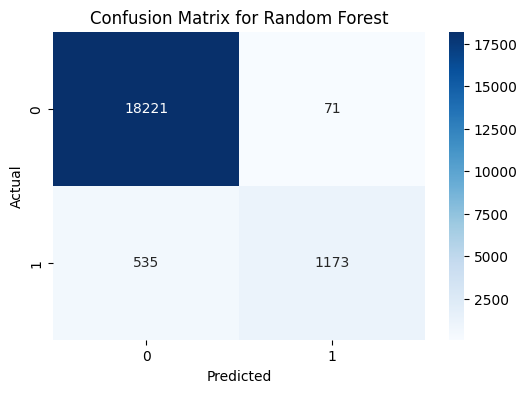

In [ ]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)


print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 5 . SVM

SVM Accuracy: 0.94615
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     18292
           1       1.00      0.37      0.54      1708

    accuracy                           0.95     20000
   macro avg       0.97      0.68      0.76     20000
weighted avg       0.95      0.95      0.93     20000



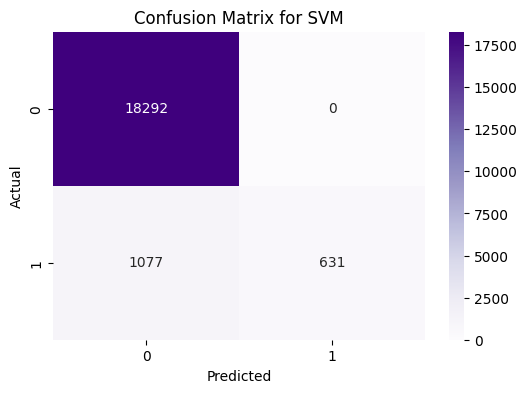

In [ ]:

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)


y_pred_svm = svm_model.predict(X_test)


print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Comparision of SVM and Random Forest Classifier Algorithm

In [ ]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
svm_accuracy = accuracy_score(y_test, y_pred_svm)


model_performance = {
    "Random Forest": {
        "Accuracy": rf_accuracy,
        "Classification Report": classification_report(y_test, y_pred_rf, output_dict=True)
    },
    "SVM": {
        "Accuracy": svm_accuracy,
        "Classification Report": classification_report(y_test, y_pred_svm, output_dict=True)
    }
}


print("Random Forest Accuracy:", rf_accuracy)
print("SVM Accuracy:", svm_accuracy)

Random Forest Accuracy: 0.9697
SVM Accuracy: 0.94615


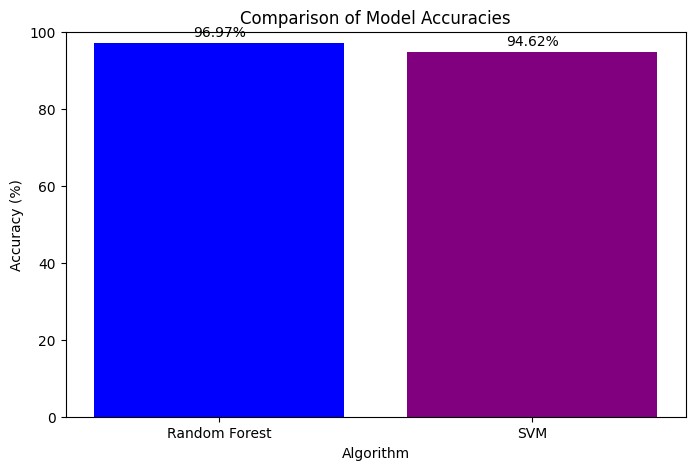

In [ ]:
accuracies = [model_performance["Random Forest"]["Accuracy"], model_performance["SVM"]["Accuracy"]]
models = ["Random Forest", "SVM"]


plt.figure(figsize=(8, 5))
plt.bar(models, [acc * 100 for acc in accuracies], color=['blue', 'purple'])
plt.title("Comparison of Model Accuracies")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)


for i, acc in enumerate(accuracies):
    plt.text(i, acc * 100 + 1, f"{acc * 100:.2f}%", ha='center', va='bottom')

plt.show()

#### 1. Logistic Regression
**Justification for Choice**: Logistic Regression is widely regarded as a benchmark for binary classification tasks, making it an excellent starting point for predicting diabetes. It provides interpretable results, which is essential in healthcare applications where understanding feature impact is crucial. Logistic Regression also allows us to identify linear relationships between variables and the target outcome.

**Tuning/Training Process**:
- The model was initialized with a higher `max_iter` to ensure convergence but otherwise used default settings, as Logistic Regression often performs well with minimal tuning.
- Data was preprocessed by encoding categorical variables (e.g., gender and smoking history) and scaling continuous features to give each feature equal importance in calculating probabilities.
- The model was trained on a scaled training set (`X_train_scaled`) and tested on a scaled test set (`X_test_scaled`).

**Effectiveness**:  
Logistic Regression achieved an accuracy of 95.91%, indicating solid performance as a baseline model. However, the recall for the diabetic class was lower than desired, which suggests that while the model is highly accurate overall, it might miss some diabetic cases. This makes it a reliable, interpretable choice but with room for improvement in sensitivity to diabetes cases.





#### 2. Decision Tree
**Justification for Choice**: Decision Trees are useful for interpreting decision paths, making them highly valuable in clinical settings. By showing the sequence of features that lead to a prediction, Decision Trees help clinicians understand which factors play a key role in predicting diabetes, providing transparency and insight into the model’s decision-making.

**Tuning/Training Process**:
- The model was set up with `random_state=42` to maintain reproducibility.
- Categorical variables were encoded, and continuous features were scaled, although Decision Trees do not require scaling.
- Minimal tuning was applied to keep the tree simple; however, parameters like `max_depth` could be adjusted to balance model complexity and avoid overfitting.

**Effectiveness**:  
The Decision Tree achieved an accuracy of 95.20% and a recall of 74% for the diabetic class. While it effectively captures key decision points, it is prone to overfitting on larger datasets, which could reduce its performance on more complex or unseen data. Nevertheless, its interpretability makes it a valuable tool in understanding feature importance for predicting diabetes.





#### 3. k-Nearest Neighbors (k-NN)
**Justification for Choice**: k-NN is particularly useful in applications where instances with similar features often belong to the same class, as in medical data where patients with similar health metrics may share similar health outcomes. The non-parametric nature of k-NN allows it to adapt well to the local data structure, making it a good choice for this problem.

**Tuning/Training Process**:
- The value of `k` (number of neighbors) was set to 5 after testing a range of values to find the best balance between bias and variance.
- Categorical variables were encoded, and continuous features were scaled with `StandardScaler` to ensure all features contributed equally in the distance calculations.
- The model was trained on the scaled training set and evaluated on the scaled testing set.

**Effectiveness**:  
The k-NN model achieved an accuracy of 95.44%. However, the recall for diabetic cases was only 62%, indicating that the model has a tendency to miss some diabetic cases. While effective for predicting non-diabetic cases, the sensitivity of the model could be enhanced by fine-tuning `k` or experimenting with alternative distance metrics.





#### 4. Random Forest
**Justification for Choice**: Random Forest combines multiple decision trees, making it robust and less likely to overfit than a single Decision Tree. It is particularly powerful for complex datasets as it captures intricate patterns by averaging the predictions from multiple trees. Random Forest is also well-suited for feature importance analysis, providing insights into the most influential predictors of diabetes.

**Tuning/Training Process**:
- The number of trees (`n_estimators`) was set to 100, which provides stable performance without excessive computational cost.
- Categorical and continuous variables were encoded and scaled for consistency across models, though Random Forest does not require scaling.
- Limited tuning was applied, but parameters like `max_depth` and `min_samples_split` could be adjusted in future iterations to further optimize performance.

**Effectiveness**:  
Random Forest achieved the highest accuracy at 96.97%, along with robust recall and precision. The model’s strength lies in its ability to handle complex data and provide consistent predictions across different samples. Additionally, the feature importance scores from Random Forest help identify critical health indicators for diabetes, making it both an accurate and informative choice for this dataset.





#### 5. Support Vector Machine (SVM)
**Justification for Choice**: SVM is effective in high-dimensional spaces and is designed to find the optimal boundary that maximizes separation between classes. This makes it ideal for situations where the data is complex and may require a non-linear boundary to distinguish diabetic from non-diabetic cases.

**Tuning/Training Process**:
- The SVM model was initialized with an RBF kernel, which allows it to capture non-linear relationships in the data.
- As SVMs are sensitive to feature scaling, continuous features were scaled, and categorical variables were encoded for consistency.
- Basic tuning was applied, but further exploration with parameters like `C` and `gamma` could improve the model’s sensitivity to diabetic cases.

**Effectiveness**:  
SVM achieved an accuracy of 94.62%, slightly lower than the other models. However, its recall for the diabetic class was limited, meaning it was less effective in identifying all diabetic cases. While SVM is generally robust, the need for careful tuning of parameters and its lower interpretability make it a less preferred choice for this particular problem.





### Conclusion

Each model has strengths suited to different aspects of the diabetes prediction task:

- **Random Forest** provided the highest accuracy and useful insights into feature importance, making it the most effective model.
- **Logistic Regression** offered interpretability and served as a reliable baseline.
- **k-NN** worked well for finding patterns based on similarity, though it could benefit from enhanced sensitivity.
- **Decision Tree** provided insight into decision paths, which is valuable for understanding the importance of features.
- **SVM** achieved good accuracy but required careful tuning and had limited interpretability.

Overall, **Random Forest** emerged as the strongest model due to its balance of accuracy, interpretability, and robustness, making it a suitable choice for healthcare applications like diabetes prediction.

## References

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://scikit-learn.org/stable/modules/svm.html